In [1]:
# Importing required libraries

import pandas as pd
import psycopg2
import psycopg2.extensions
import sqlalchemy
from sqlalchemy import create_engine
%matplotlib inline

In [2]:
# Create connection to Database

conn = psycopg2.connect(
    database='Market',
    user='postgres',
    password='',
    host='localhost',
    port='5432'
)
print('Connected to Postgres DB')

Connected to Postgres DB


In [3]:
# List ALL Available Tables in DB

tables = pd.read_sql_query("select * "
                        "from pg_catalog.pg_tables "
                        "where schemaname != 'pg_catalog' and schemaname != 'information_schema'"
                        , conn)
tables.head()

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,dax,postgres,None,False,False,False,False
1,public,dow,postgres,None,False,False,False,False
2,public,stoxx,postgres,None,False,False,False,False
3,public,cac40,postgres,None,True,False,False,False
4,public,sp500,postgres,None,False,False,False,False


In [4]:
# Load data table to review available information sorting by Date column in ascending order

df = pd.read_sql_query('select * from cac40 order by "Date" asc', conn)

df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2014-11-03,4225.810059,4238.459961,4185.410156,4194.029785,4194.029785,123590300.0
1,2014-11-04,4177.200195,4208.520020,4118.500000,4130.189941,4130.189941,142148700.0
2,2014-11-05,4163.509766,4214.350098,4145.609863,4208.419922,4208.419922,126747900.0
3,2014-11-06,4193.479980,4275.299805,4180.319824,4227.680176,4227.680176,163811600.0
4,2014-11-07,4238.870117,4239.560059,4161.149902,4189.890137,4189.890137,144094600.0


In [6]:
# Load data table to review available data with Volume larger than the specified amount

df = pd.read_sql_query('select * '
                       'from cac40 '
                       'where "Volume" > 600000', conn)
df.head(20)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2014-11-03,4225.810059,4238.459961,4185.410156,4194.029785,4194.029785,123590300.0
1,2014-11-04,4177.200195,4208.520020,4118.500000,4130.189941,4130.189941,142148700.0
2,2014-11-05,4163.509766,4214.350098,4145.609863,4208.419922,4208.419922,126747900.0
3,2014-11-06,4193.479980,4275.299805,4180.319824,4227.680176,4227.680176,163811600.0
4,2014-11-07,4238.870117,4239.560059,4161.149902,4189.890137,4189.890137,144094600.0
5,2014-11-10,4184.180176,4224.830078,4174.979980,4222.819824,4222.819824,123847500.0
6,2014-11-11,4227.120117,4252.919922,4223.680176,4244.100098,4244.100098,99662200.0
7,2014-11-12,4232.339844,4242.620117,4175.290039,4179.879883,4179.879883,122989000.0
8,2014-11-13,4203.669922,4220.740234,4153.169922,4187.950195,4187.950195,131579800.0
9,2014-11-14,4208.109863,4208.129883,4164.790039,4202.459961,4202.459961,109621000.0


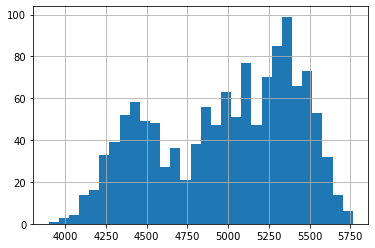

In [7]:
# Display Volume histogram

df.Adj_Close.hist(bins=30)

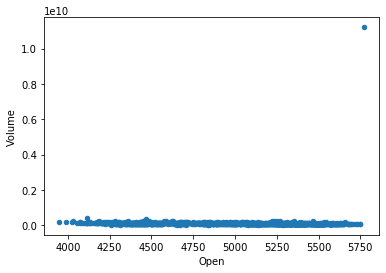

In [9]:
# Display Scatter plot

df.plot.scatter(x='Open', y='Volume')

In [10]:
# re-labeling headers to maintain related table-data together

df = df.rename(columns={'Open':'CAC40_Open', 'High':'CAC40_High', 'Low':'CAC40_Low', 'Adj_Close':'CAC40_Adj_Close', 'Volume':'CAC40_Volume'})
df.head()

,Date,CAC40_Open,CAC40_High,CAC40_Low,Close,CAC40_Adj_Close,CAC40_Volume
0,2014-11-03,4225.810059,4238.459961,4185.410156,4194.029785,4194.029785,123590300.0
1,2014-11-04,4177.200195,4208.520020,4118.500000,4130.189941,4130.189941,142148700.0
2,2014-11-05,4163.509766,4214.350098,4145.609863,4208.419922,4208.419922,126747900.0
3,2014-11-06,4193.479980,4275.299805,4180.319824,4227.680176,4227.680176,163811600.0
4,2014-11-07,4238.870117,4239.560059,4161.149902,4189.890137,4189.890137,144094600.0


In [16]:
# Load second data table to review available information sorting by "Date" in ascending order

df2 = pd.read_sql_query('select * '
                        'from dax '
                        'order by "Date" ASC', conn)
df2.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2014-11-03,26.049999,26.049999,26.049999,26.049999,23.429771,200.0
1,2014-11-04,25.500000,25.500000,25.500000,25.500000,22.935097,2500.0
2,2014-11-05,25.639999,25.639999,25.639999,25.639999,23.061012,300.0
3,2014-11-06,25.559999,25.559999,25.559999,25.559999,22.989059,200.0
4,2014-11-07,25.459999,25.459999,25.459999,25.459999,22.899120,100.0


In [17]:
# Load data table to review available data with Volume larger than the specified amount

df2 = pd.read_sql_query('select * '
                        'from dax '
                        'where "Volume" > 30000', conn)
df2.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2015-01-22,26.209999,26.440001,26.177999,26.320000,23.672617,93600.0
1,2015-01-23,26.870001,26.870001,26.230000,26.230000,23.591669,106100.0
2,2015-01-29,26.480000,27.000000,26.480000,26.973000,24.259933,35300.0
3,2015-02-03,27.889999,27.889999,27.389999,27.667999,24.885025,52300.0
4,2015-02-04,27.670000,27.670000,27.030001,27.139999,24.410133,80800.0


In [18]:
# re-labeling headers to maintain related table-data together

df2 = df2.rename(columns={'Open':'DAX_Open', 'High':'DAX_High', 'Low':'DAX_Low', 'Adj_Close':'DAX_Adj_Close', 'Volume':'DAX_Volume'})
df2.head()

,Date,DAX_Open,DAX_High,DAX_Low,Close,DAX_Adj_Close,DAX_Volume
0,2015-01-22,26.209999,26.440001,26.177999,26.320000,23.672617,93600.0
1,2015-01-23,26.870001,26.870001,26.230000,26.230000,23.591669,106100.0
2,2015-01-29,26.480000,27.000000,26.480000,26.973000,24.259933,35300.0
3,2015-02-03,27.889999,27.889999,27.389999,27.667999,24.885025,52300.0
4,2015-02-04,27.670000,27.670000,27.030001,27.139999,24.410133,80800.0


In [19]:
# Create new dataframe by joining tables using "Date" as primary key

newdf = df.merge(df2, on='Date', how='inner')
newdf.head()

,Date,CAC40_Open,CAC40_High,CAC40_Low,Close_x,CAC40_Adj_Close,CAC40_Volume,DAX_Open,DAX_High,DAX_Low,Close_y,DAX_Adj_Close,DAX_Volume
0,2015-01-22,4486.759766,4569.549805,4462.169922,4552.799805,4552.799805,208073500.0,26.209999,26.440001,26.177999,26.320000,23.672617,93600.0
1,2015-01-23,4588.490234,4673.299805,4585.640137,4640.689941,4640.689941,222514400.0,26.870001,26.870001,26.230000,26.230000,23.591669,106100.0
2,2015-01-29,4571.049805,4632.379883,4571.049805,4631.430176,4631.430176,117222200.0,26.480000,27.000000,26.480000,26.973000,24.259933,35300.0
3,2015-02-03,4651.069824,4701.520020,4645.149902,4677.899902,4677.899902,146301200.0,27.889999,27.889999,27.389999,27.667999,24.885025,52300.0
4,2015-02-04,4682.810059,4696.299805,4651.779785,4696.299805,4696.299805,130750800.0,27.670000,27.670000,27.030001,27.139999,24.410133,80800.0


In [ ]:
# 
cur = conn.cursor()

In [34]:
cur.close()

conn.close()